<a href="https://colab.research.google.com/github/moeuu/colab/blob/main/algorithm/2/enumerate_prime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 素数列挙三種

以下に3種類の素数列挙法を関数として定義して，その性能を比較してみる．

## 単純な方法による素数列挙

まず，与えられた正整数xが素数か否かを単純な方法で判定する関数is_prime_simplyを以下に定義する．

In [ ]:
def is_prime_simply(x):
    for y in range(2, x):
        if x % y == 0:
            return False
    return True

定義した関数is_prime_simplyを早速試してみる．

In [ ]:
is_prime_simply(23)

True

In [ ]:
is_prime_simply(24)

False

正しく定義できたようだ．

次に，素数判定アルゴリズムを実装した関数を利用して，素数を列挙するアルゴリズムを関数enumerate_primeとして定義する．
後々再利用可能なように，素数判定関数を引数で指定できるようにしておく．

In [ ]:
def enumerate_prime(n, is_prime): # Pythonは関数も引数にできるから便利
    P = []
    for x in range(2, n + 1):
        if is_prime(x):
            P.append(x)
    return P

素数判定関数としてis_prime_simplyを指定して100までの素数を列挙してみる．

In [ ]:
enumerate_prime(100, is_prime_simply)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

確かに素数を列挙できているようだ．


## 平方根を利用して少しだけ賢く素数列挙

次に，平方根を素数判定に利用するアルゴリズムを関数is_prime_sqrtとして以下に定義する．

In [ ]:
import math # 平方根の計算のために数学関数モジュールmathをimport

def is_prime_sqrt(x):
    for y in range(2, int(math.sqrt(x)) + 1):
        if x % y == 0:
            return False
    return True

早速，関数is_prime_sqrtを試してみる．

In [ ]:
is_prime_sqrt(23)

True

In [ ]:
is_prime_sqrt(24)

False

確かに素数を判定できているようだ．

この素数判定関数を用いて再度素数を列挙してみる．
素数判定関数としてis_prime_sqrtを指定して，100までの素数を列挙する．

In [ ]:
enumerate_prime(100, is_prime_sqrt)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

先ほどと同じ結果が得られた．

## エラトステネスの篩を用いて素数列挙

素数列挙の最後としてエラトステネスの篩を関数eratosthenesとして以下に定義する．

In [ ]:
def eratosthenes(n):
    P = []
    q = [True for i in range(n + 1)]
    for i in range(2, n + 1):
        if q[i] == True:
            P.append(i)
            for j in range(2, n // i + 1):
                q[i * j] = False
    return P

早速，関数eratosthenesを試してみる．

In [ ]:
eratosthenes(100)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

やはり先ほどと同じ結果が得られた．

## 3種類の素数列挙アルゴリズムの計算時間

ここまでに実装した3種類の素数列挙アルゴリズムの計算時間を比較してみる．

In [ ]:
%%time
_ = enumerate_prime(10**5, is_prime_simply) # 素数が表示されるとうざいので，素数はデフォルト変数に格納

CPU times: user 31.4 s, sys: 125 ms, total: 31.5 s
Wall time: 31.6 s


単純な方法によって10万までの素数を列挙すると約30秒かかる．

In [ ]:
%%time
_ = enumerate_prime(10**5, is_prime_sqrt)

CPU times: user 188 ms, sys: 2.99 ms, total: 191 ms
Wall time: 194 ms


一方で，平方根を利用して10万までの素数を列挙すれば1秒もかからない．
より正確には200ミリ秒くらいである．

In [ ]:
%%time
_ = enumerate_prime(10**6, is_prime_sqrt)

CPU times: user 4.52 s, sys: 24 ms, total: 4.55 s
Wall time: 4.56 s


さらに，平方根を利用して100万までの素数を列挙しても高々5秒程度である．

1000万までの素数の列挙はどうだろうか？

In [ ]:
%%time
_ = enumerate_prime(10**7, is_prime_sqrt)

CPU times: user 2min 2s, sys: 879 ms, total: 2min 3s
Wall time: 2min 3s


1000万までの素数を平方根利用によって列挙すると2分くらいかかる．

エラトステネスの篩を用いるとどうだろうか？

In [ ]:
%%time
_ = eratosthenes(10**7)

CPU times: user 4.49 s, sys: 151 ms, total: 4.64 s
Wall time: 4.65 s


エラトステネスの篩ならば1000万までの素数を列挙しても5秒程度で終わる．

列挙する素数の上界$n$を固定して比較するのではなく，$n$を変化させて３種類のアルゴリズムの計算時間とその傾向を探ることにする．

単純な素数列挙法を待てるのはせいぜい$n = 10^5$程度までなので，$n = 1 \times 10^4, \ 2 \times 10^4, \ \dots, \ 10 \times 10^4$に関して計算時間を計測し，プロットして観察してみる．

まず，$n$のリストを用意する．

In [ ]:
N = [i * 10**4 for i in range(1, 11)]
N

[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

次に，それぞれのアルゴリズムの計算時間を計測しリストに保存する．

In [ ]:
import time # 大まかな計算時間がわかればいいのでtimeモジュールを利用
cpu_time_dict = {'simple': [], 'sqrt': [], 'eratosthenes': []}
for n in N:
    start_time = time.time()
    _ = enumerate_prime(n, is_prime_simply)
    cpu_time_dict['simple'].append(time.time() - start_time)
    start_time = time.time()
    _ = enumerate_prime(n, is_prime_sqrt)
    cpu_time_dict['sqrt'].append(time.time() - start_time)
    start_time = time.time()
    _ = eratosthenes(n)
    cpu_time_dict['eratosthenes'].append(time.time() - start_time)

そしてグラフにプロットしてみる．

In [ ]:
import matplotlib.pyplot as plt # プロット用にmatplotlibをimport

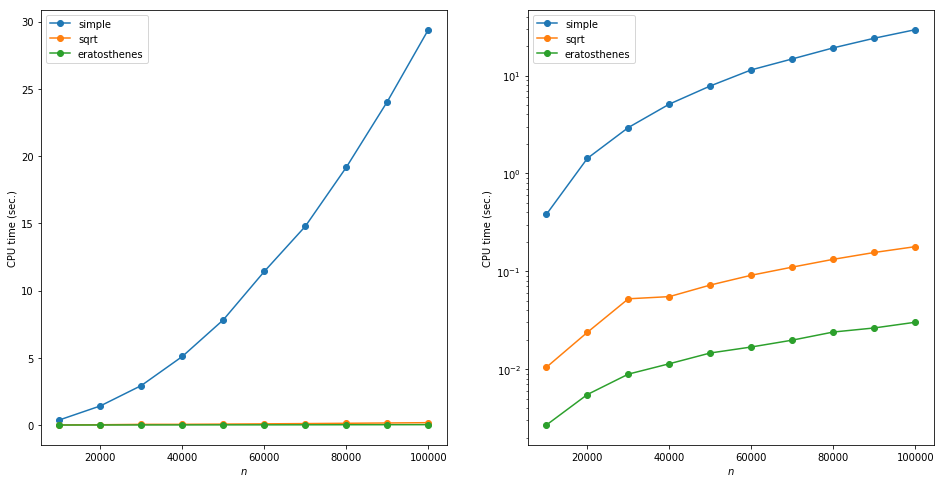

In [ ]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.2)
scale_dict = {1: 'linear', 2: 'log'}
for i, scale in scale_dict.items():
    plt.subplot(1, 2, i)
    plt.xlabel('$n$')
    plt.ylabel('CPU time (sec.)')
    plt.yscale(scale)
    for algo, ctime in cpu_time_dict.items():
        _ = plt.plot(N, ctime, 'o-', label=algo)
    _ = plt.legend()

左のグラフは横軸に列挙される素数の上界$n$，縦軸に計算時間（秒）をプロットしたものである．
この場合は，平方根を利用するアルゴリズムとエラトステネスの篩の違いがわからない．

右のグラフは縦軸の計算時間（秒）を対数にしてプロットしたものである．
こうすると，エラトステネスの篩が圧倒的に速いことがわかる．
